In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Customers_Orders_Data.csv")

C:\Users\Saanvi\AppData\Local\Temp\ipykernel_26644\337707899.py:1: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Customers_Orders_Data.csv")


In [5]:
df.head()

,Unnamed: 0,fsn_id,order_date,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,order_payment_type,sla,cust_id,pincode,product_mrp,product_procurement_sla
0,0,ACCCX3S58G7B5F6P,2023-10-17 15:11:54,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,7190,0
1,1,ACCCX3S58G7B5F6P,2023-10-19 10:07:22,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,7190,0
2,2,ACCCX3S5AHMF55FV,2023-10-20 15:45:56,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,2099,3
3,3,ACCCX3S5AHMF55FV,2023-10-14 12:05:15,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,2099,3
4,4,ACCCX3S5AHMF55FV,2023-10-17 21:25:03,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,2099,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1648824 non-null  int64  
 1   fsn_id                   1648824 non-null  object 
 2   order_date               1648824 non-null  object 
 3   order_id                 1648824 non-null  float64
 4   order_item_id            1648824 non-null  float64
 5   gmv                      1648824 non-null  object 
 6   units                    1648824 non-null  int64  
 7   deliverybdays            1648824 non-null  object 
 8   deliverycdays            1648824 non-null  object 
 9   order_payment_type       1648824 non-null  object 
 10  sla                      1648824 non-null  int64  
 11  cust_id                  1648824 non-null  object 
 12  pincode                  1648824 non-null  object 
 13  product_mrp              1648824 non-null 

In [7]:
df.describe()

,Unnamed: 0,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06,1.648824e+06
mean,8.244115e+05,2.842445e+15,1.375628e+16,1.022087e+00,5.687832e+00,4.108309e+03,5.403451e+00
std,4.759746e+05,1.269134e+15,5.594598e+16,2.535318e-01,2.983336e+00,8.510918e+03,5.346618e+01
min,0.000000e+00,7.633152e+07,1.080165e+08,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.122058e+05,1.602589e+15,1.606725e+15,1.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,8.244115e+05,2.611825e+15,2.619185e+15,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,1.236617e+06,3.610614e+15,4.397706e+15,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,1.648823e+06,5.395077e+15,3.000373e+17,5.000000e+01,1.006000e+03,2.999990e+05,1.000000e+03


In [8]:
null_counts = df.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Unnamed: 0                 0
fsn_id                     0
order_date                 0
order_id                   0
order_item_id              0
gmv                        0
units                      0
deliverybdays              0
deliverycdays              0
order_payment_type         0
sla                        0
cust_id                    0
pincode                    0
product_mrp                0
product_procurement_sla    0
dtype: int64


In [10]:
 #Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Find columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 80].index.tolist()

# Print the number of columns to be dropped
print("Number of columns with more than 80% missing values:", len(columns_to_drop))

# Print the names of the columns to be dropped
print("Columns to be dropped:", columns_to_drop)


Number of columns with more than 80% missing values: 0
Columns to be dropped: []


In [12]:
df1 = pd.read_csv("Customers_Orders_Data.csv")  # Merging the two datasets
df2 = pd.read_csv("SKU_details.csv")

C:\Users\Saanvi\AppData\Local\Temp\ipykernel_26644\2554443677.py:1: DtypeWarning: Columns (5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("Customers_Orders_Data.csv")  # Merging the two datasets


In [14]:
df_merged = pd.merge(df1, df2, on="fsn_id", how="outer")

In [15]:
df_merged.to_csv("merged_dataset.csv", index=False)

In [16]:
df = df_merged  # Rename df_merged to df
df.to_csv("merged_dataset.csv", index=False)

In [18]:
df.head()

,Unnamed: 0,fsn_id,order_date,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,order_payment_type,sla,cust_id,pincode,product_mrp,product_procurement_sla,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical
0,0,ACCCX3S58G7B5F6P,2023-10-17 15:11:54,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,7190,0,CE,CameraAccessory,CameraAccessory,CameraTripod
1,1,ACCCX3S58G7B5F6P,2023-10-19 10:07:22,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,7190,0,CE,CameraAccessory,CameraAccessory,CameraTripod
2,207388,ACCCX3S58G7B5F6P,2023-11-11 13:47:36,3.440848e+15,3.440848e+15,6471,1,\N,\N,COD,6,6.47047573679152E+018,-4.41480239906083E+018,7190,0,CE,CameraAccessory,CameraAccessory,CameraTripod
3,207389,ACCCX3S58G7B5F6P,2023-11-10 19:34:54,2.440148e+15,2.440148e+15,6400,1,\N,\N,Prepaid,4,9.77673513519528E+017,6.02277801189945E+018,7190,0,CE,CameraAccessory,CameraAccessory,CameraTripod
4,337624,ACCCX3S58G7B5F6P,2023-12-26 22:24:34,2.480037e+15,2.480037e+15,6900,1,\N,\N,Prepaid,8,-6.83528316691827E+017,7.33541149097431E+018,7190,0,CE,CameraAccessory,CameraAccessory,CameraTripod


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 19 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Unnamed: 0                       1648824 non-null  int64  
 1   fsn_id                           1648824 non-null  object 
 2   order_date                       1648824 non-null  object 
 3   order_id                         1648824 non-null  float64
 4   order_item_id                    1648824 non-null  float64
 5   gmv                              1648824 non-null  object 
 6   units                            1648824 non-null  int64  
 7   deliverybdays                    1648824 non-null  object 
 8   deliverycdays                    1648824 non-null  object 
 9   order_payment_type               1648824 non-null  object 
 10  sla                              1648824 non-null  int64  
 11  cust_id                          1648824 non-null 

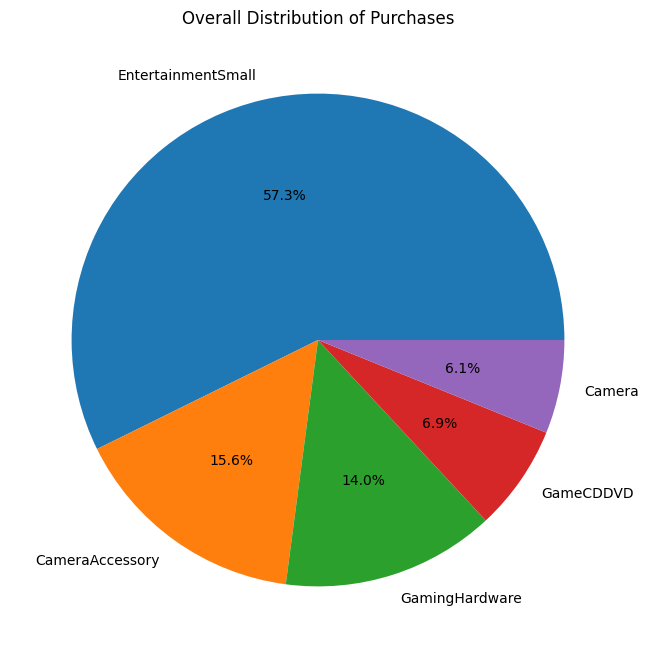

In [21]:
df["product_analytic_category"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Overall Distribution of Purchases")
plt.ylabel("")  
plt.show()

In [22]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [23]:
df["Year"] = df["order_date"].dt.year
df["Month"] = df["order_date"].dt.month
df["Day"] = df["order_date"].dt.day

df["Hour"] = df["order_date"].dt.hour
df["Minute"] = df["order_date"].dt.minute
df["Second"] = df["order_date"].dt.second

In [24]:
print(df)

         Unnamed: 0            fsn_id          order_date      order_id  \
0                 0  ACCCX3S58G7B5F6P 2023-10-17 15:11:54  3.419301e+15   
1                 1  ACCCX3S58G7B5F6P 2023-10-19 10:07:22  1.420831e+15   
2            207388  ACCCX3S58G7B5F6P 2023-11-11 13:47:36  3.440848e+15   
3            207389  ACCCX3S58G7B5F6P 2023-11-10 19:34:54  2.440148e+15   
4            337624  ACCCX3S58G7B5F6P 2023-12-26 22:24:34  2.480037e+15   
...             ...               ...                 ...           ...   
1648819     1439165  VPLEYY9JXP8GHGXV 2023-07-30 16:33:26  1.781770e+08   
1648820     1439166  VPLEYY9JXP8GHGXV 2023-07-07 19:22:40  1.678947e+08   
1648821     1439167  VPLEYY9JXP8GHGXV 2023-07-29 16:38:13  1.777426e+08   
1648822     1439168  VPLEYY9JXP8GHGXV 2023-07-12 16:18:10  1.703373e+08   
1648823     1439169  VPLEYY9JXP8GHGXV 2023-07-15 19:59:22  1.718940e+08   

         order_item_id    gmv  units deliverybdays deliverycdays  \
0         3.419301e+15   6400  

In [25]:
df.drop(columns=["order_date"], inplace=True)

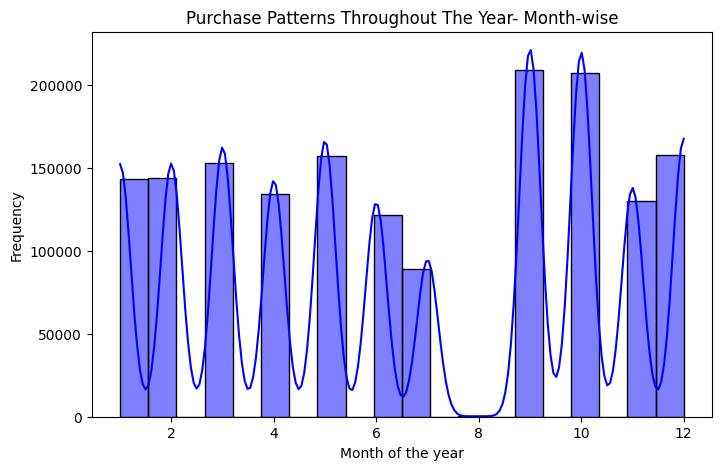

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Month"], bins=20, kde=True, color="blue")  # kde=True adds a density curve
plt.xlabel("Month of the year")
plt.ylabel("Frequency")
plt.title("Purchase Patterns Throughout The Year- Month-wise")
plt.show()

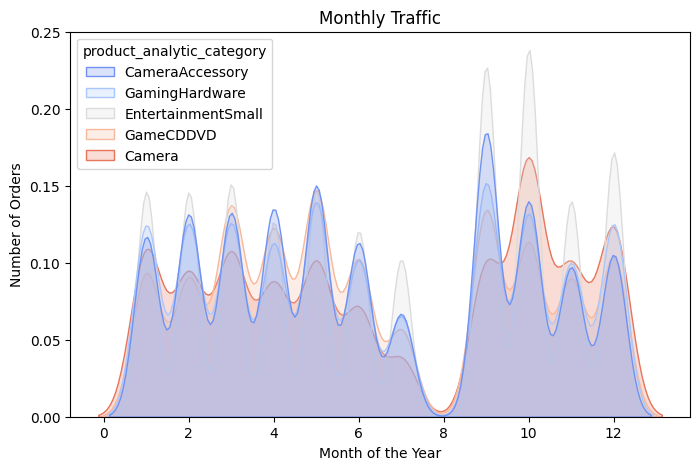

In [27]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Month", hue="product_analytic_category", fill=True, common_norm=False, palette="coolwarm")
plt.xlabel("Month of the Year")
plt.ylabel("Number of Orders")
plt.title("Monthly Traffic")
plt.show()

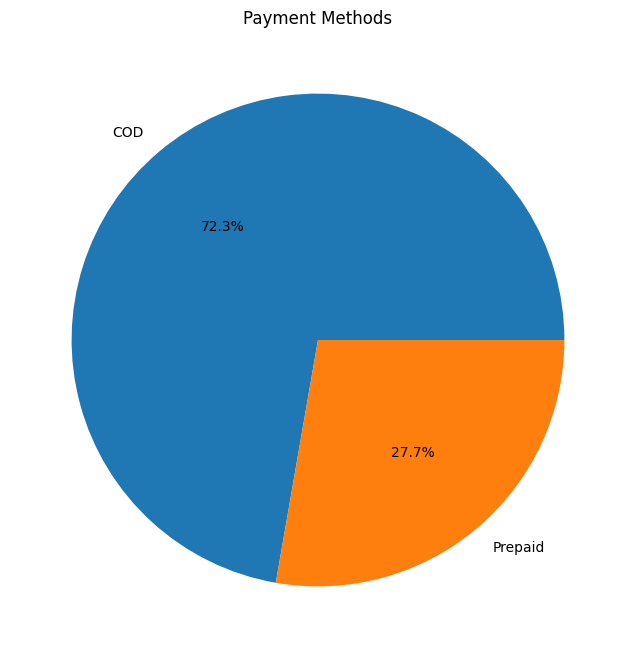

In [28]:
df["order_payment_type"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Payment Methods")
plt.ylabel("")  
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 24 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Unnamed: 0                       1648824 non-null  int64  
 1   fsn_id                           1648824 non-null  object 
 2   order_id                         1648824 non-null  float64
 3   order_item_id                    1648824 non-null  float64
 4   gmv                              1648824 non-null  object 
 5   units                            1648824 non-null  int64  
 6   deliverybdays                    1648824 non-null  object 
 7   deliverycdays                    1648824 non-null  object 
 8   order_payment_type               1648824 non-null  object 
 9   sla                              1648824 non-null  int64  
 10  cust_id                          1648824 non-null  object 
 11  pincode                          1648824 non-null 